# RAINFALL PREDICTION  - Weather Forecasting

In [1]:
#Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import the WeatherAus dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [4]:
#To find the first five data details
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Data Exploration

In [5]:
#To find the Dimension of the dataset 

df.shape

(8425, 23)

In [6]:
#To find the information about the Data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

The Dataset Contains the following details
Number of columns: 23
Number of rows: 145460
Number of Independent Columns: 22
Number of Dependent Column: 1
Dataset has two data types: float64, object

In [7]:
#To describe the Dataset 

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [8]:
#DATA PROCESSING
#To check the null values in the Dataset 

df.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
8421,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
8422,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
8423,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#To check the total null values in the dataset 

df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In this Dataset Except for the Date, Location columns, every column has missing values.

In [11]:
#To check the datatype of each column 

df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [12]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In this dataset Rain Tomorrow column is the Dependent Variable and Rest of all are the columns are Independent Variable

<AxesSubplot:>

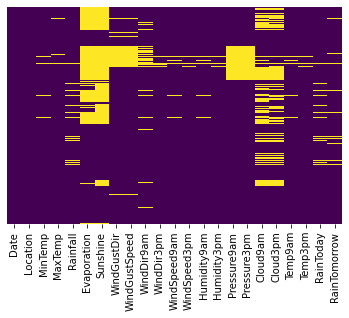

In [13]:
#Missing Data We can use seaborn to create a simple heatmap

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Here We can use seaborn to create a simple heatmap to identify the Missing Data in the Dataset

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

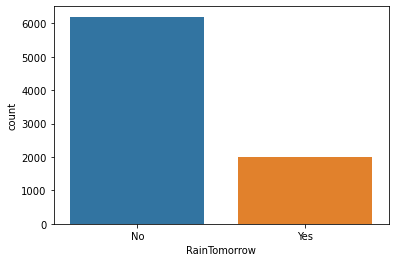

In [14]:
#To plot the graph 
sns.countplot(x='RainTomorrow',data=df)

In this Count plot is used to Visualize the Target Variable

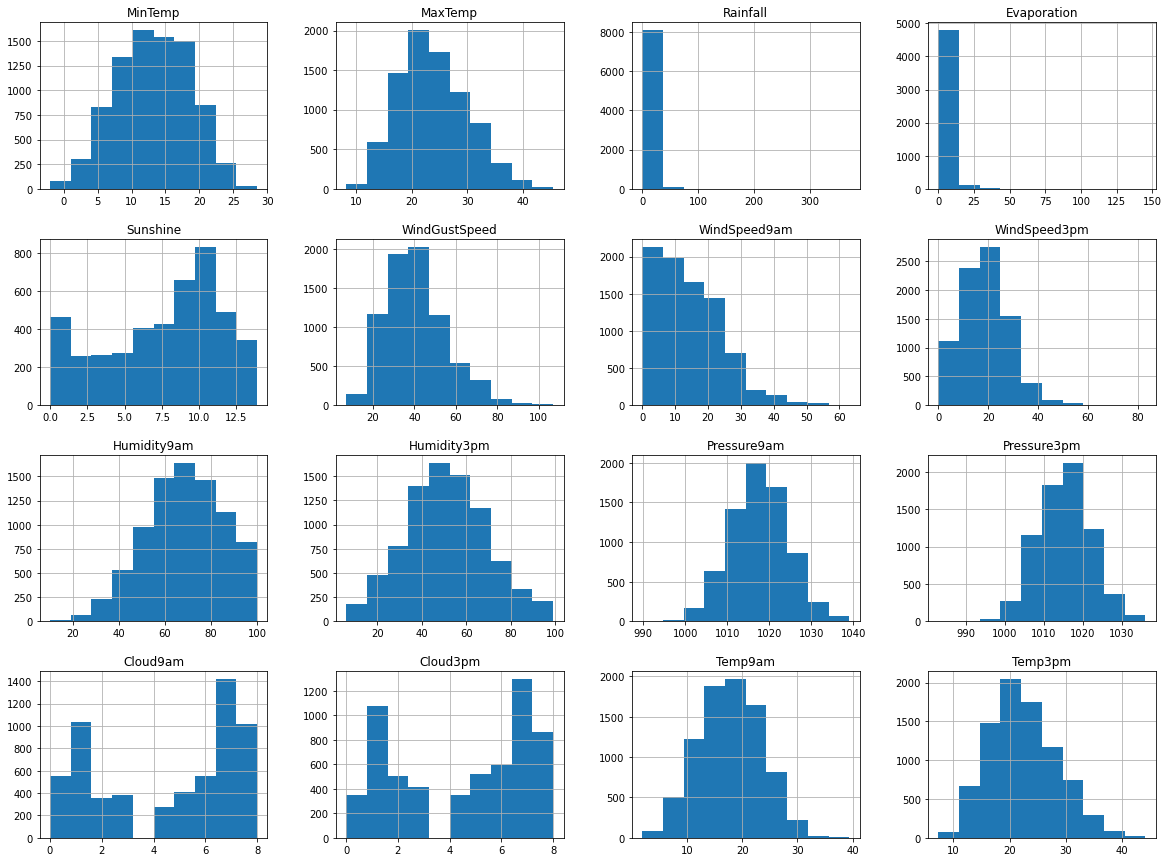

In [15]:

#To plot the graph in numerical datas

fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

<AxesSubplot:>

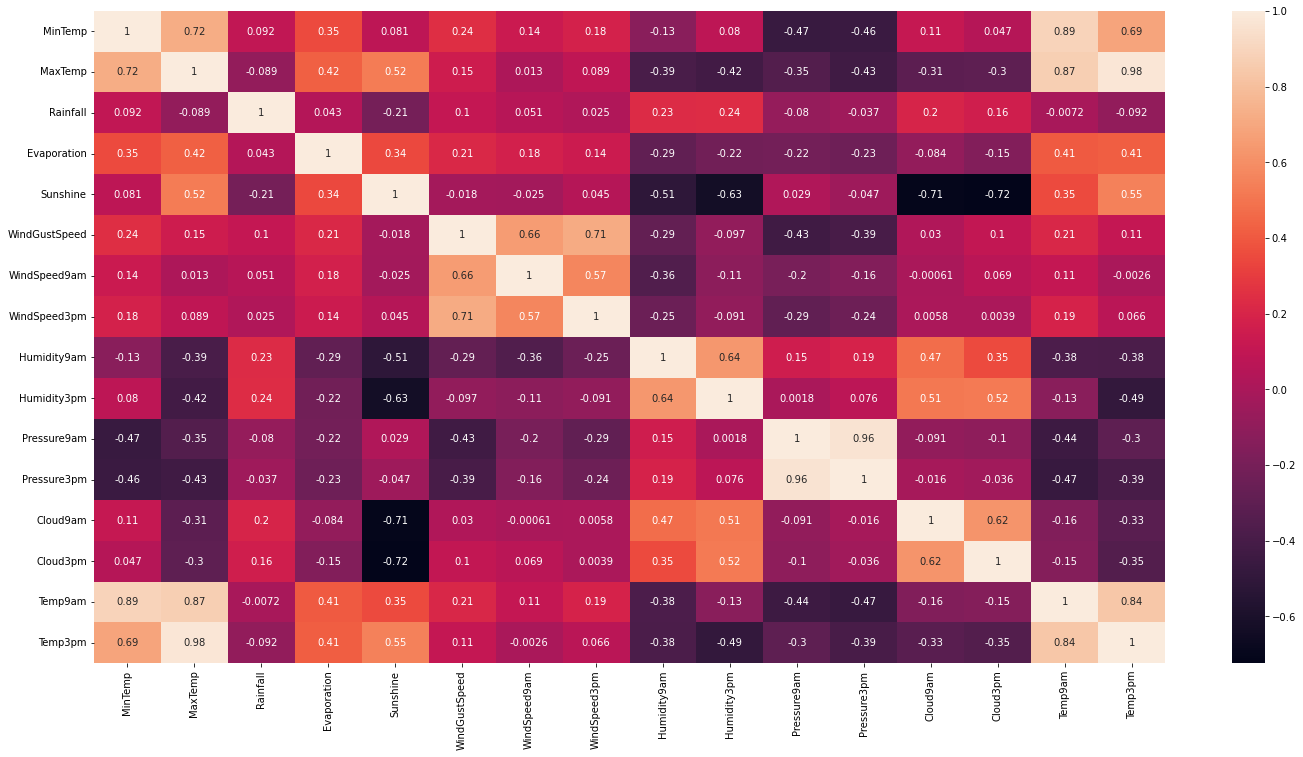

In [16]:
#To check the Correlation in the Dataset using Heatmap

plt.figure(figsize =(24,12))
sns.heatmap(df.corr(), annot = True)

In this Heatmap is used to identify the Correlation between the Dependent Variable (Rain Tomorrow) and rest of the Independent Variables

<AxesSubplot:>

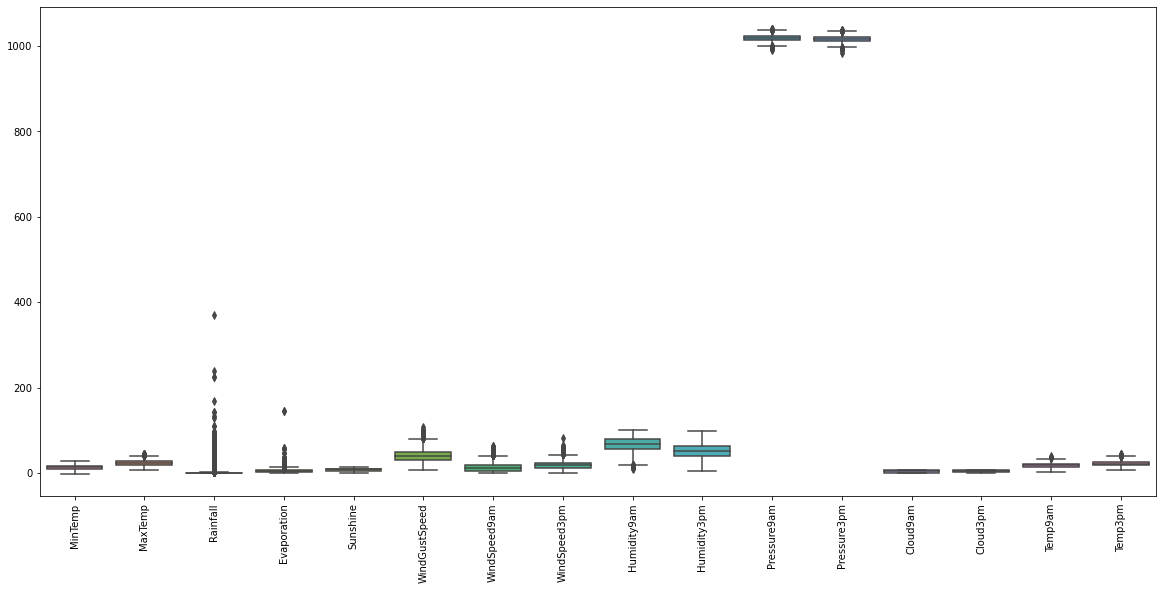

In [17]:
#To find the Outliers using box plot 

plt.figure(figsize=(20,9))
plt.xticks(rotation=90)
sns.boxplot (data=df)

In [18]:
#DATA CLEANING
# To Drop the Date and Location Column 

df.drop(['Date','Location'],axis = 1, inplace = True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [19]:
#Separating numeric and categorical features

categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
numerical_features=[column_name for column_name in df.columns if df[column_name].dtype != 'O']
print('Numeric:',numerical_features,'\n')
print('Categoric:',categorical_features)

Numeric: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 

Categoric: ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


After removing the date and Location here In this dataset total no of columns is 21 The ramaining columns are separated in two types

Numeric (Numerical Features)
Categoric (Categorical Features)

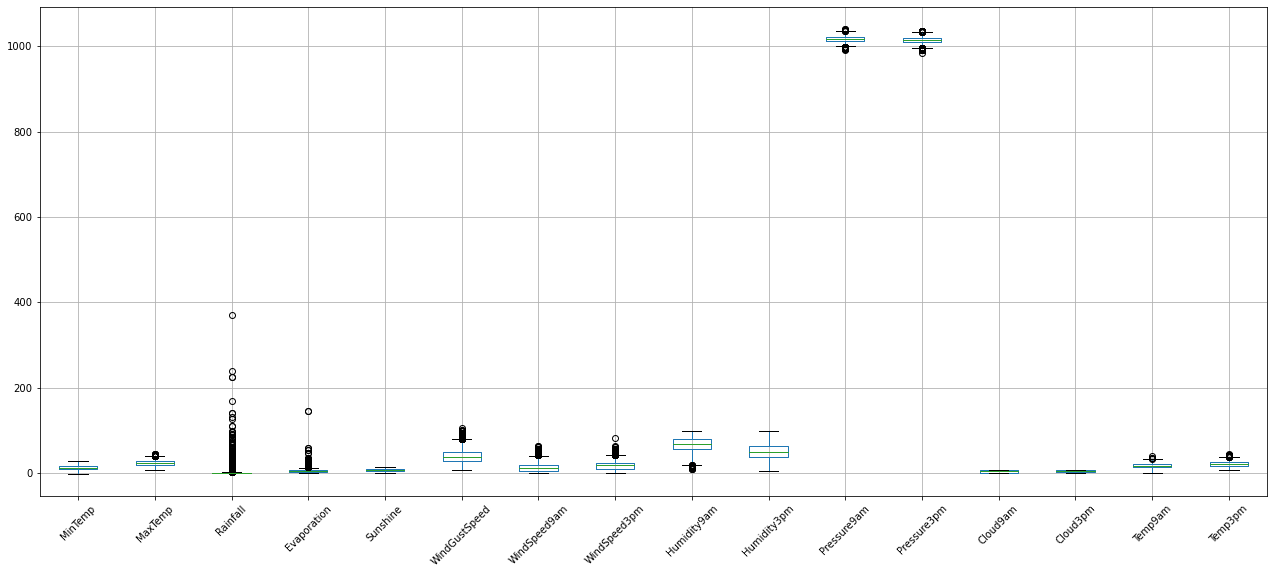

In [20]:
# checking for the outliers in numeric cols

plt.figure(figsize=(22,9));
df.boxplot();
plt.xticks(rotation=45);

Here outliers are present in Rainfall, Evaporation, WindSpeed9am attributes. So we need to get the exact values of outliers using IQR method.

In [21]:
# Handling missing values or nan values

df.isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [22]:
# Handling NaN values in numerical cols

for  i in numerical_features:
    df[i] = df[i].fillna(df[i].mean())

In [23]:
df.isnull().sum()  # now no nan values in numeric cols

MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In this Numerical Features Column null values are replaced with mean values

In [24]:
# Handling NaN values in categorical cols

for i in categorical_features:
    df[i] = df[i].fillna(df[i].mode()[0])

In [25]:
df.isnull().sum()  # now no nan values in categorical cols

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In this Categorical Features Column null values are replaced with mode Values

In [26]:
# Finding number of outliers in each colm using IQR method (Using Quantile)

def detect_outliers_iqr(data):
    outlier_list = []
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list # Driver code



for i in numerical_features:
    outliers = detect_outliers_iqr(df[i])
    print("Number of Outliers in",i,"attribute :", len(outliers))

Number of Outliers in MinTemp attribute : 0
Number of Outliers in MaxTemp attribute : 37
Number of Outliers in Rainfall attribute : 1342
Number of Outliers in Evaporation attribute : 1729
Number of Outliers in Sunshine attribute : 2336
Number of Outliers in WindGustSpeed attribute : 217
Number of Outliers in WindSpeed9am attribute : 135
Number of Outliers in WindSpeed3pm attribute : 94
Number of Outliers in Humidity9am attribute : 22
Number of Outliers in Humidity3pm attribute : 0
Number of Outliers in Pressure9am attribute : 223
Number of Outliers in Pressure3pm attribute : 198
Number of Outliers in Cloud9am attribute : 0
Number of Outliers in Cloud3pm attribute : 0
Number of Outliers in Temp9am attribute : 5
Number of Outliers in Temp3pm attribute : 54


Here we have to find the total no of outliers is still present in the dataset using IQR Method

In [27]:
# Handling outliers using IQR method (Using Quantile)

def handle_outliers(data):

    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    b = np.where(data<lwr_bound, lwr_bound, data)

    b1 = np.where(b>upr_bound, upr_bound, b)
    return b1
    
    
for i in numerical_features:
    df[i]=handle_outliers(df[i])

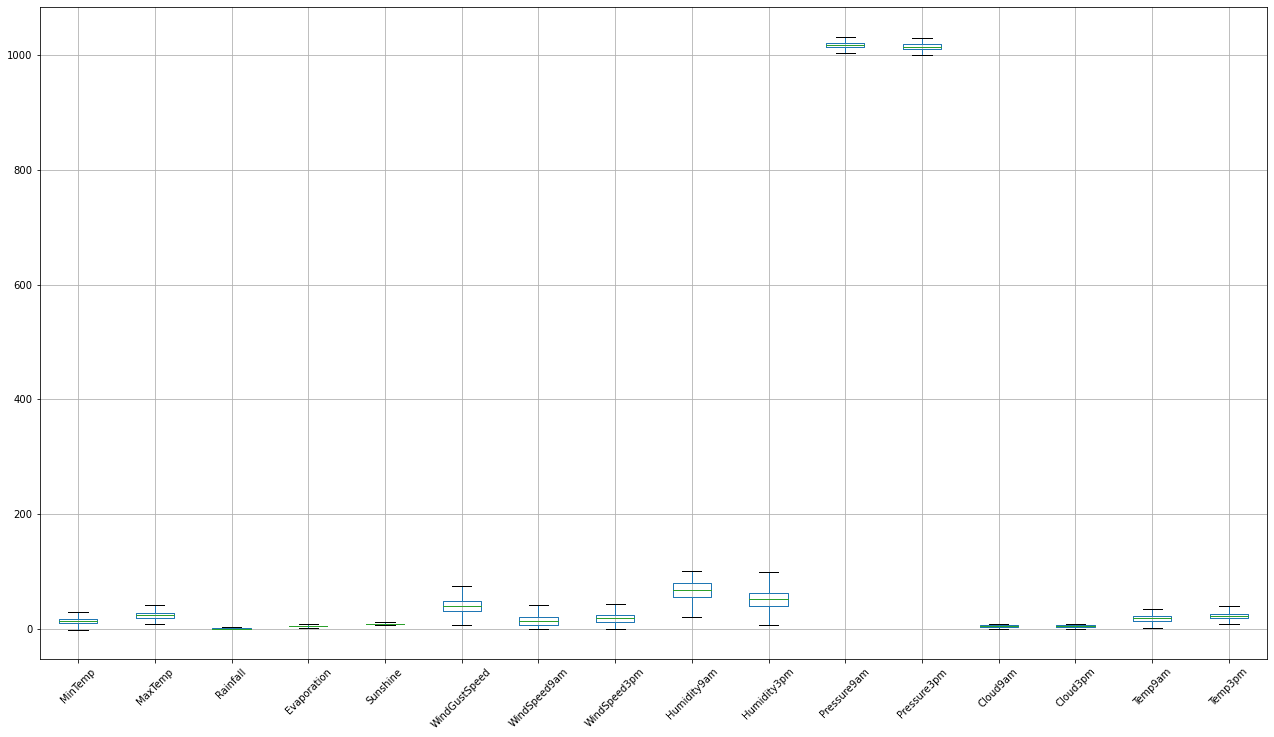

In [28]:
# verifying  

plt.figure(figsize=(22,12));
df.boxplot();
plt.xticks(rotation=45);

# outliers are handled

In [29]:
# Checking for duplicates

df[df.duplicated()]  

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1737,13.193305,23.859976,0.000000,5.389395,7.632205,N,40.174469,N,SE,13.847646,...,67.822496,51.24979,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,No,No
1738,13.193305,23.859976,0.000000,5.389395,7.632205,N,40.174469,N,SE,13.847646,...,67.822496,51.24979,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,No,No
1814,13.193305,23.859976,2.805913,5.389395,7.632205,N,40.174469,N,SE,13.847646,...,67.822496,51.24979,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,No,No
1815,13.193305,23.859976,2.805913,5.389395,7.632205,N,40.174469,N,SE,13.847646,...,67.822496,51.24979,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,No,No
1816,13.193305,23.859976,2.805913,5.389395,7.632205,N,40.174469,N,SE,13.847646,...,67.822496,51.24979,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143,20.300000,25.000000,0.000000,7.473489,7.300000,S,39.000000,S,SSW,17.000000,...,77.000000,60.00000,1015.200000,1014.000000,8.000000,2.000000,20.800000,23.800000,No,No
6144,16.100000,24.500000,0.000000,4.400000,10.801693,S,50.000000,S,S,13.000000,...,67.000000,55.00000,1018.500000,1016.900000,4.566622,4.503183,18.900000,23.700000,No,No
6145,16.600000,30.700000,2.805913,7.473489,10.801693,SSE,39.000000,WSW,SSE,9.000000,...,69.000000,55.00000,1016.900000,1013.500000,4.566622,4.503183,20.500000,26.300000,No,No
6146,20.000000,30.400000,2.805913,7.473489,10.801693,SSE,37.000000,SW,S,13.000000,...,64.000000,55.00000,1012.700000,1009.200000,4.566622,4.503183,24.100000,27.400000,No,No



Here 260 rows are have an duplicated Values, so we have to drop these rows

In [30]:
# Drop duplicates

df.drop_duplicates(inplace=True)
df.shape

(6752, 21)

After removing the duplicated values now our dataset have an 145200 rows and 21 columns are there.

Now the dataset is cleaned
Handled outliers
Handled NaN values
Removed Duplicates

In [31]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df[numerical_features]=scale.fit_transform(df[numerical_features]) 
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.052325,-0.194673,-0.153605,0.236477,-0.273057,W,0.386336,W,WNW,0.762707,...,0.202717,-1.538399,-1.692487,-1.381121,1.452546,0.056374,-0.173508,-0.150445,No,No
1,-1.029855,0.164999,-0.598042,0.236477,-0.273057,WNW,0.386336,NNW,WSW,-0.913248,...,-1.371507,-1.376332,-1.198102,-1.260881,0.067238,0.056374,-0.121074,0.270197,No,No
2,-0.037857,0.263091,-0.598042,0.236477,-0.273057,WSW,0.540880,W,WSW,0.657960,...,-1.721335,-1.106221,-1.709535,-1.106286,0.067238,-1.019679,0.543092,0.085115,No,No
3,-0.705201,0.639111,-0.598042,0.236477,-0.273057,NE,-1.159104,SE,E,-0.180018,...,-1.313203,-1.862533,-0.004757,-0.402021,0.067238,0.056374,0.036229,0.640362,No,No
4,0.791814,1.342105,0.142686,0.236477,-0.273057,W,0.154520,ENE,NW,-0.599006,...,0.844068,-0.944154,-1.164006,-1.570070,1.049063,1.559565,-0.016206,1.178783,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,-1.859527,-0.112929,-0.598042,0.236477,-0.273057,E,-0.618200,SE,ENE,0.029477,...,-0.963375,-1.430355,1.188587,0.886268,0.067238,0.056374,-1.362015,-0.049491,No,No
8421,-1.715236,0.197696,-0.598042,0.236477,-0.273057,NNW,-1.313648,SE,N,0.029477,...,-0.671852,-1.592422,1.001061,0.680141,0.067238,0.056374,-1.222191,0.303848,No,No
8422,-1.390582,0.459275,-0.598042,0.236477,-0.273057,N,-0.154568,SE,WNW,-0.389512,...,-0.846766,-1.430355,0.574867,0.285066,0.067238,0.056374,-0.942542,0.573059,No,No
8423,-0.957710,0.475624,-0.598042,0.236477,-0.273057,SE,-0.850016,SSE,N,0.029477,...,-0.963375,-1.430355,0.302103,0.233535,-0.564867,-1.019679,-0.488113,0.556234,No,No


In [32]:
#Encoding of Categorical Features
# Here these categorical data need to converted to numerical data for modeling, which is called Feature Encoding.

In [33]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [34]:
# Encoding Categorical Features using replace function:

df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

Here Rain Today and Rain Tomorrow is the Categorical Features value, So we need to replace the Categorical features to numerical feature using replace function

In [35]:
# Encoding Categorical Features using replace function:
#function which takes feature name as a parameter and return mapping dictionary to replace(or map) 
#categorical data to numerical data.

def encode_data(categorical_features):
       
    mapping_dict = {}
    unique_values = list(df[categorical_features].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

In [36]:
df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}


In [37]:
df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'N': 8, 'SSW': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}


In [38]:
df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}


In [39]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.052325,-0.194673,-0.153605,0.236477,-0.273057,0,0.386336,0,0,0.762707,...,0.202717,-1.538399,-1.692487,-1.381121,1.452546,0.056374,-0.173508,-0.150445,0,0
1,-1.029855,0.164999,-0.598042,0.236477,-0.273057,1,0.386336,1,1,-0.913248,...,-1.371507,-1.376332,-1.198102,-1.260881,0.067238,0.056374,-0.121074,0.270197,0,0
2,-0.037857,0.263091,-0.598042,0.236477,-0.273057,2,0.540880,0,1,0.657960,...,-1.721335,-1.106221,-1.709535,-1.106286,0.067238,-1.019679,0.543092,0.085115,0,0
3,-0.705201,0.639111,-0.598042,0.236477,-0.273057,3,-1.159104,2,2,-0.180018,...,-1.313203,-1.862533,-0.004757,-0.402021,0.067238,0.056374,0.036229,0.640362,0,0
4,0.791814,1.342105,0.142686,0.236477,-0.273057,0,0.154520,3,3,-0.599006,...,0.844068,-0.944154,-1.164006,-1.570070,1.049063,1.559565,-0.016206,1.178783,0,0


There are many feature encoding techniques like One hot encoding, label encoding. But in this particular project, I will be using replace() function to encode categorical data to numerical data.


In [40]:
#To Encoding Categorical data to Numerical data is done

In [41]:
#Classification models
# In this section, we will implement several models and compare their performance.

In [44]:
#To apply the Machine Learning Algorithm

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn import svm # SVM
from sklearn.svm import NuSVC
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB #Naive Byes
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


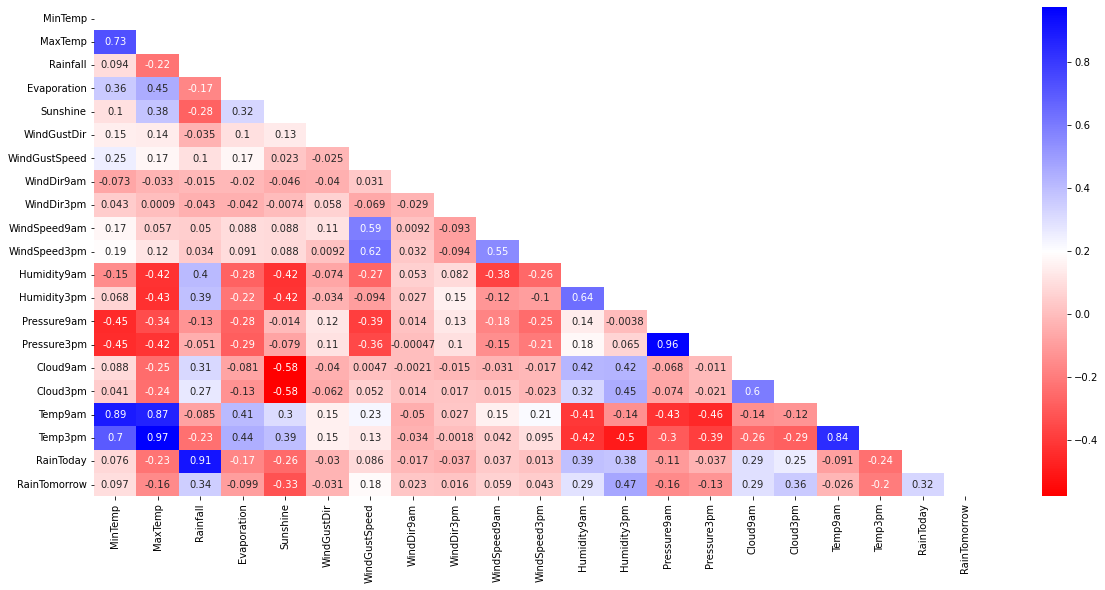

In [45]:
#Finding the Correlation

matrix = np.triu(df.corr())
plt.figure(figsize=(20,9));
sns.heatmap(df.corr(),mask=matrix, annot=True, cmap='bwr_r');

In [46]:
#Split dataset in features and target variable

feature_cols=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
              'Humidity9am','Humidity3pm', 'Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am', 'Temp3pm',
              'WindGustDir','WindDir9am','WindDir3pm','RainToday']
X = df[feature_cols] # Features
y = df.RainTomorrow # Target variable

So, we are preparing the data by spliting the features as X and Y ,Here X defines the feature columns and Y defines the target variable

In [47]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) # 80% training and 20% test

In [48]:
#Decision Tree Classifier
# Decision Tree Classifier Algorithm

dec_tree_clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dec_tree_clf = dec_tree_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dec_tree_clf.predict(X_test)


#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
dt1_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("Accuracy:",dt1_accuracy)

print('\n',classification_report(y_test,y_pred))

Confusion matrix:
 [[871 181]
 [154 145]]
Accuracy: 75.2

               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1052
           1       0.44      0.48      0.46       299

    accuracy                           0.75      1351
   macro avg       0.65      0.66      0.65      1351
weighted avg       0.76      0.75      0.76      1351



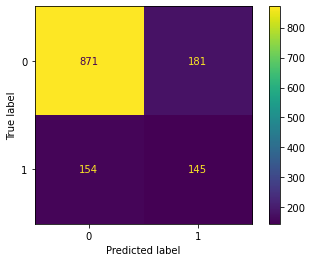

In [49]:
#Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dec_tree_clf, X_test, y_test)

Text(0, 0.5, 'True Positive Rate')

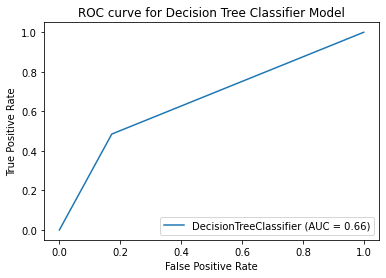

In [50]:
# Visualize the Performance of the  Decision Tree Classifier Model

metrics.plot_roc_curve(dec_tree_clf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 
plt.title('ROC curve for Decision Tree Classifier Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')


In [51]:
#Decision Tree Classifier Algorithm Using Entropy

dec_tree_entrpy = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
dec_tree_entrpy = dec_tree_entrpy.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dec_tree_entrpy.predict(X_test)


#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
dt2_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("Accuracy:",dt2_accuracy)

print('\n',classification_report(y_test,y_pred))

Confusion matrix:
 [[990  62]
 [163 136]]
Accuracy: 83.35

               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1052
           1       0.69      0.45      0.55       299

    accuracy                           0.83      1351
   macro avg       0.77      0.70      0.72      1351
weighted avg       0.82      0.83      0.82      1351



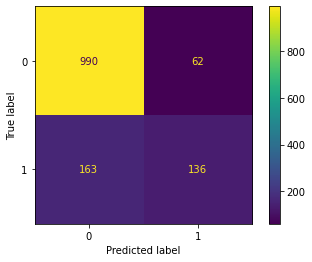

In [52]:
#Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dec_tree_entrpy, X_test, y_test)

Text(0, 0.5, 'True Positive Rate')

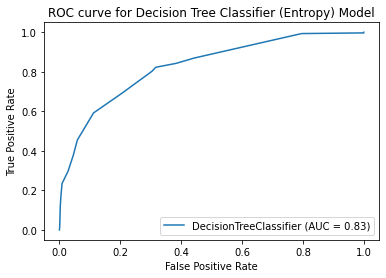

In [53]:
# Visualize the Performance of the (Decision Tree Classifier (Entropy)) Model

metrics.plot_roc_curve(dec_tree_entrpy, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 
plt.title('ROC curve for Decision Tree Classifier (Entropy) Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')

In [54]:
# Random Forest

ran_f=RandomForestClassifier(n_estimators=100)

# Train the dataset
ran_f = ran_f.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = ran_f.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
rf_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("Accuracy:",rf_accuracy)

print('\n',classification_report(y_test,y_pred))

Confusion matrix:
 [[996  56]
 [150 149]]
Accuracy: 84.75

               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1052
           1       0.73      0.50      0.59       299

    accuracy                           0.85      1351
   macro avg       0.80      0.72      0.75      1351
weighted avg       0.84      0.85      0.84      1351



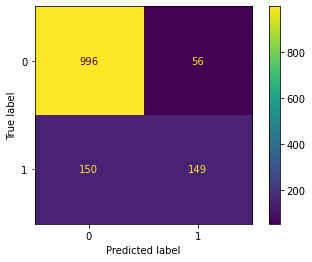

In [55]:
#Confusion Matrix  (Random Forest Classifier)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(ran_f, X_test, y_test)

Text(0, 0.5, 'True Positive Rate')

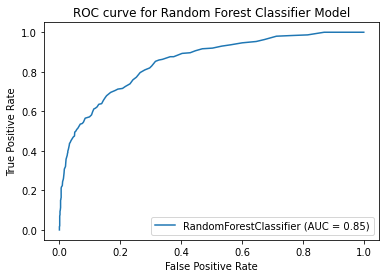

In [56]:
# Visualize the Performance of the Model

metrics.plot_roc_curve(ran_f, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 
plt.title('ROC curve for Random Forest Classifier Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')

In [57]:
# Logistic Regression

lr_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs') 

# Train the dataset
lr_clf = lr_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = lr_clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
lr_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("Accuracy:",lr_accuracy)

print('\n',classification_report(y_test,y_pred))

Confusion matrix:
 [[988  64]
 [144 155]]
Accuracy: 84.6

               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1052
           1       0.71      0.52      0.60       299

    accuracy                           0.85      1351
   macro avg       0.79      0.73      0.75      1351
weighted avg       0.84      0.85      0.84      1351



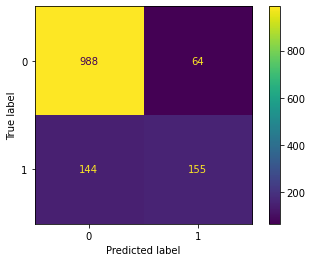

In [58]:
#Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr_clf, X_test, y_test)

Text(0, 0.5, 'True Positive Rate')

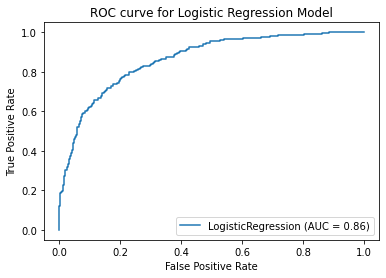

In [59]:
# Visualize the Performance of the Model

metrics.plot_roc_curve(lr_clf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')

In [62]:
#Model Evaluation
model_ev = pd.DataFrame({'Model': ['Decision Tree Classifier','Decision Tree Classifier (Entropy)','Random Forest',
                                   'Logistic Regression'],
                                    'Accuracy': [dt1_accuracy,dt2_accuracy, rf_accuracy, lr_accuracy]})

model_ev.sort_values(by='Accuracy',ignore_index=True,inplace=True)
model_ev

,Model,Accuracy
0,Decision Tree Classifier,75.20
1,Decision Tree Classifier (Entropy),83.35
2,Logistic Regression,84.60
3,Random Forest,84.75
